In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2

%matplotlib inline

In [60]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('train X shape:', train_X.shape)
print('test X shape:', test_X.shape)
print('train y shape:', train_y.shape)
print('test y shape:', test_y.shape)

train X shape: (60000, 28, 28)
test X shape: (10000, 28, 28)
train y shape: (60000,)
test y shape: (10000,)


Label:  5


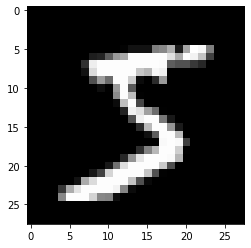

In [61]:
plt.imshow(train_X[0], cmap=plt.get_cmap('gray'))
print('Label: ', train_y[0])

In [62]:
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

print(train_X.shape)

(60000, 28, 28, 1)


In [0]:
from keras.utils import to_categorical

train_y = to_categorical(train_y)

In [0]:
# train_X[0]

In [0]:
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255

# train_X[0]

In [51]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(train_X, train_y, epochs=25, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 33s 695us/step - loss: 0.1612 - accuracy: 0.9521 - val_loss: 0.0685 - val_accuracy: 0.9795
Epoch 2/25
48000/48000 [==============================] - 33s 686us/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 0.0581 - val_accuracy: 0.9835
Epoch 3/25
48000/48000 [==============================] - 33s 681us/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0589 - val_accuracy: 0.9836
Epoch 4/25
48000/48000 [==============================] - 33s 683us/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0579 - val_accuracy: 0.9837
Epoch 5/25
48000/48000 [==============================] - 33s 684us/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0623 - val_accuracy: 0.9843
Epoch 6/25
48000/48000 [==============================] - 33s 692us/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0686 - val_accuracy: 0.9820
Epoch 7/25
48000/48000 [==============================] 

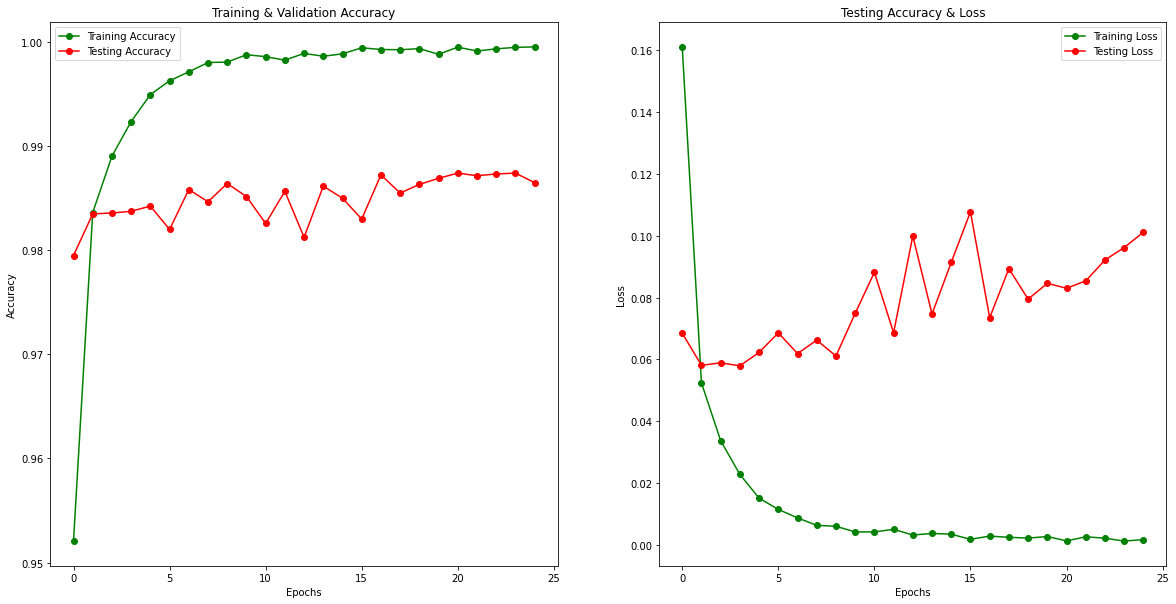

In [53]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = model.history.history['accuracy']
train_loss = model.history.history['loss']
val_acc = model.history.history['val_accuracy']
val_loss = model.history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [0]:
print("Loss of the model is - " , model.evaluate(test_X, test_y)[0] , "%")
print("Accuracy of the model is - " , model.evaluate(test_X, test_y)[1]*100 , "%")

In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, model.predict_classes(test_X))
cm

array([[ 974,    1,    0,    0,    0,    0,    3,    1,    1,    0],
       [   0, 1131,    0,    1,    0,    0,    3,    0,    0,    0],
       [   2,    5, 1017,    0,    1,    0,    1,    6,    0,    0],
       [   0,    1,    3,  994,    0,    6,    1,    3,    2,    0],
       [   0,    0,    0,    0,  973,    0,    3,    1,    0,    5],
       [   1,    0,    1,    5,    0,  880,    3,    0,    2,    0],
       [   3,    2,    0,    0,    1,    2,  949,    0,    1,    0],
       [   0,    4,    6,    1,    0,    0,    0, 1015,    1,    1],
       [   2,    1,    3,    1,    1,    1,    3,    4,  955,    3],
       [   2,    4,    0,    2,    4,    3,    0,   10,    3,  981]])